In [1]:
# fill 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [4]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


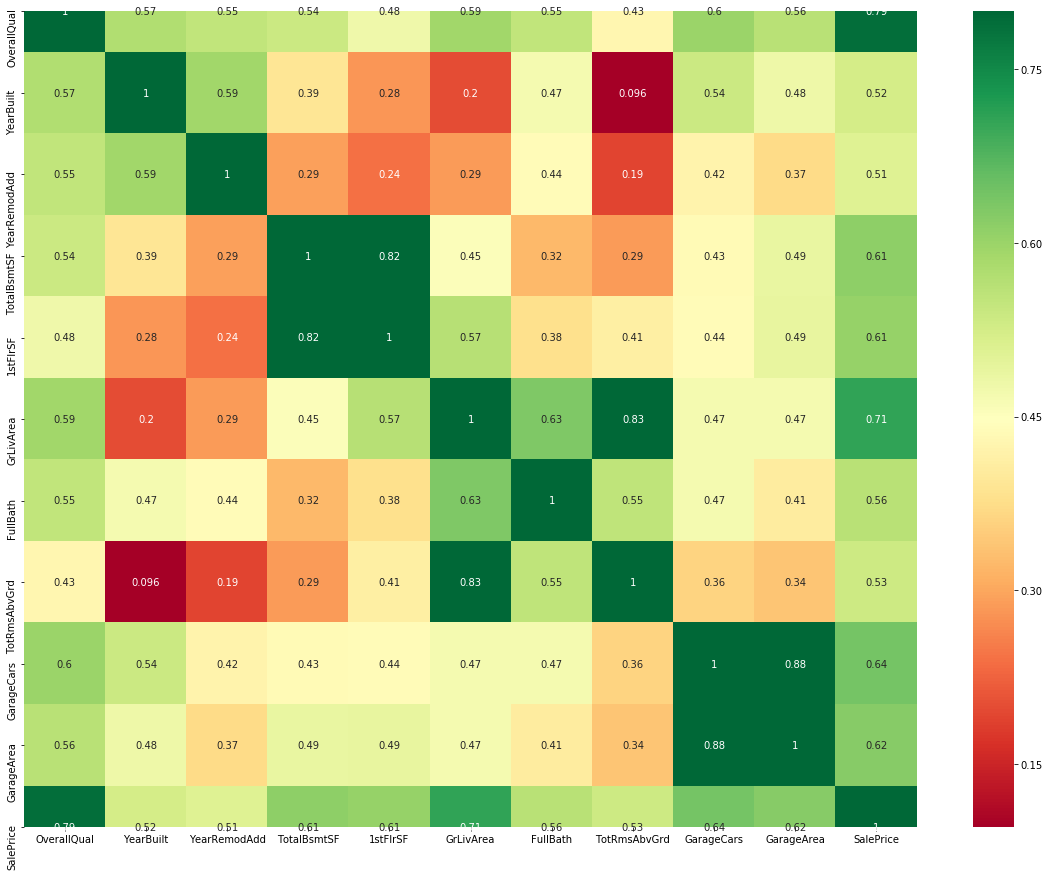

In [6]:
#correlation matrix
corrmat = Data_train.corr()
corrmatindex = corrmat['SalePrice'][abs(corrmat['SalePrice'])>0.5].index
corrmat = Data_train[corrmatindex].corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, annot=True,cmap="RdYlGn");

# Observe the data

In [7]:
numerical_feats = Data_train.dtypes[Data_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = Data_train.dtypes[Data_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [8]:
conti_numerical_feats=[]
class_numerical_feats=[]
for i in numerical_feats:
    #print(i,len(Data_train[i].unique()))
    if(i=='YearBuilt'):
         class_numerical_feats.append(i)
    elif(len(Data_train[i].unique())<100):
        class_numerical_feats.append(i)
    else:
        conti_numerical_feats.append(i)

In [9]:
conti_numerical_feats.remove('Id')
conti_numerical_feats.remove('SalePrice')
conti_numerical_feats

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch']

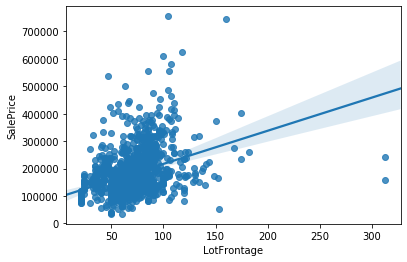

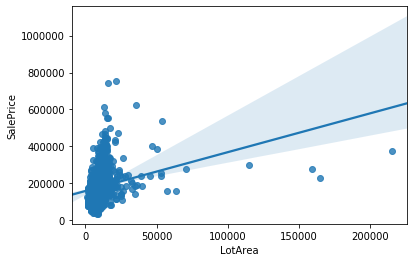

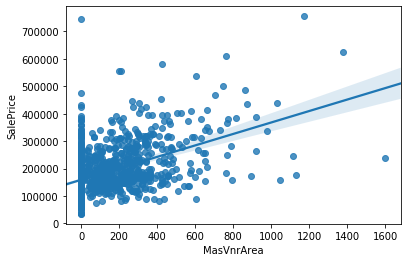

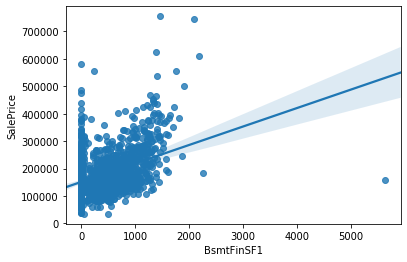

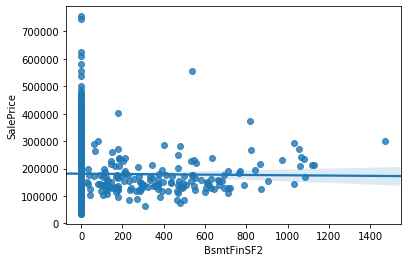

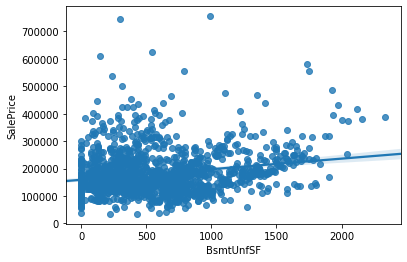

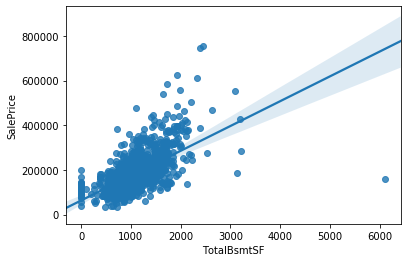

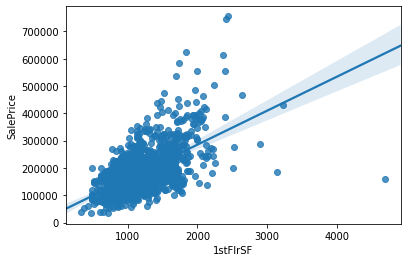

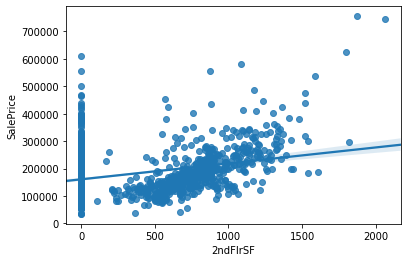

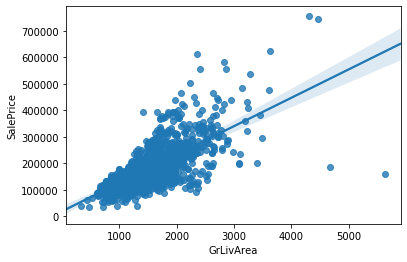

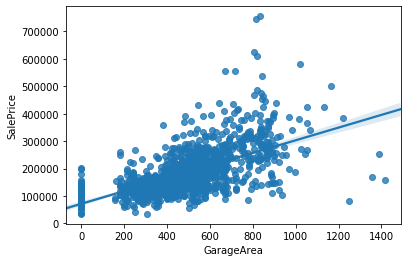

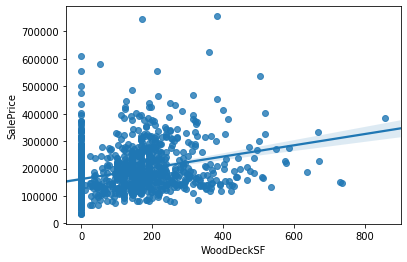

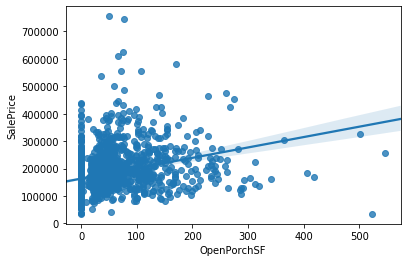

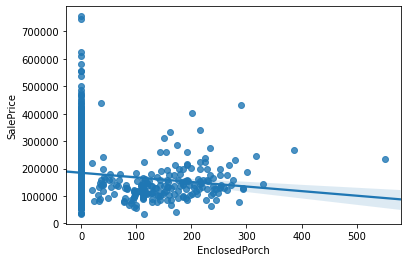

In [10]:
for i in conti_numerical_feats:
    plt.figure(i)
    sns.regplot(x=i, y="SalePrice", data=Data_train)
    #sns.scatterplot(x = i, y = 'SalePrice', data = Data_train)

In [11]:
conti_numerical_feats=['LotFrontage','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

In [12]:
class_numerical_feats

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

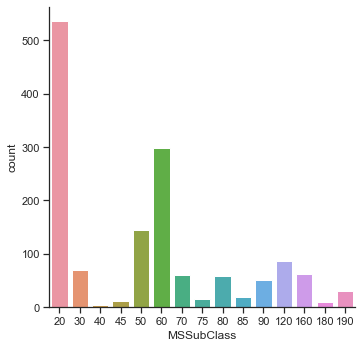

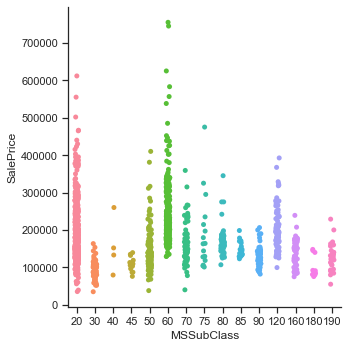

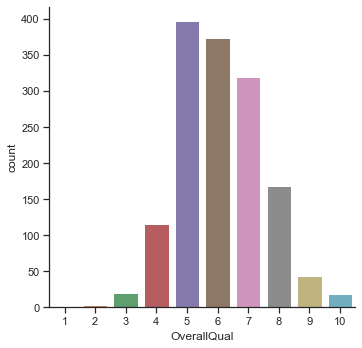

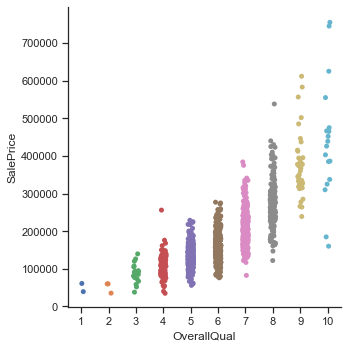

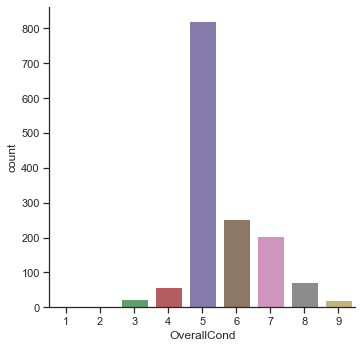

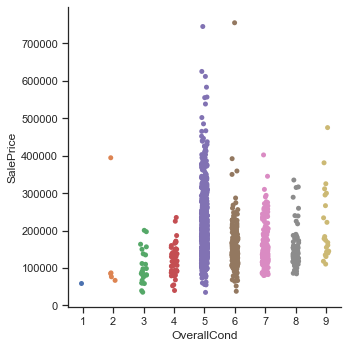

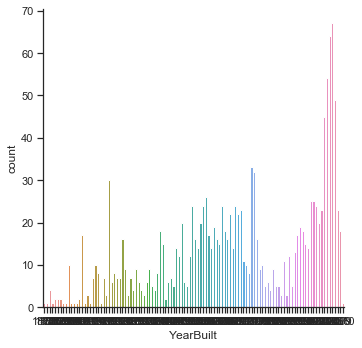

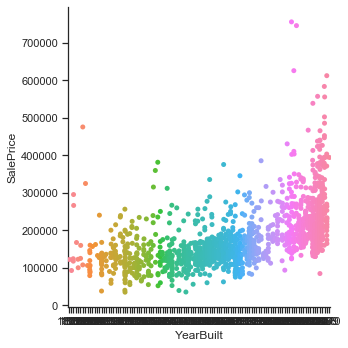

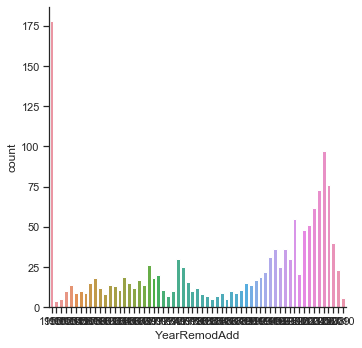

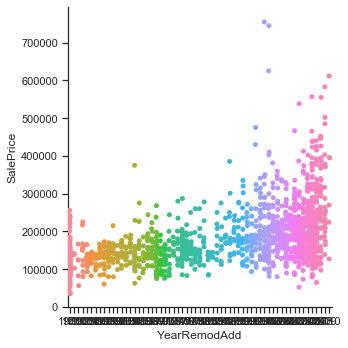

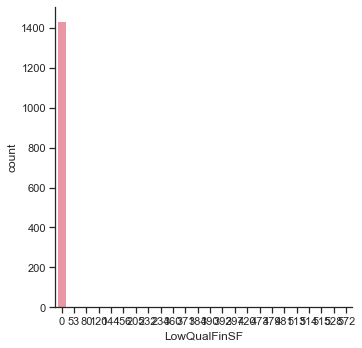

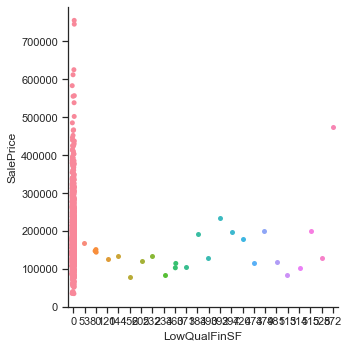

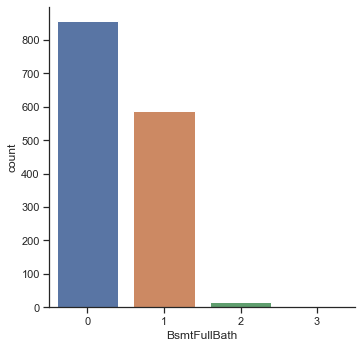

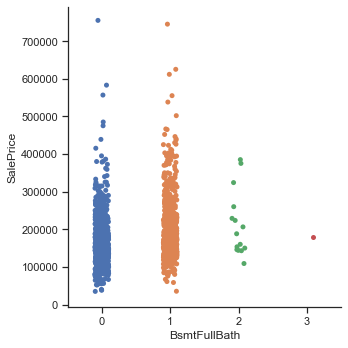

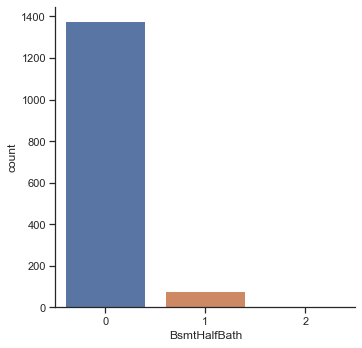

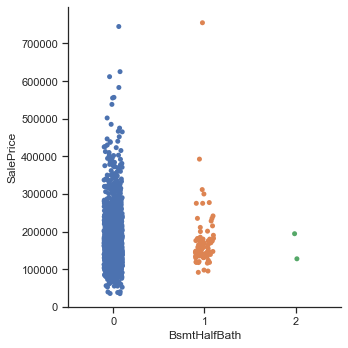

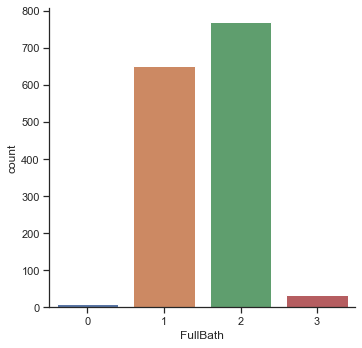

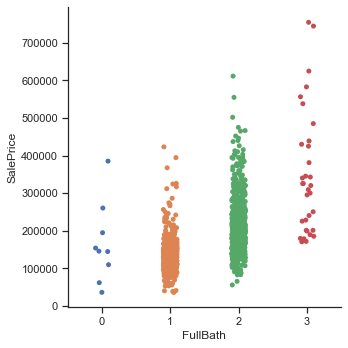

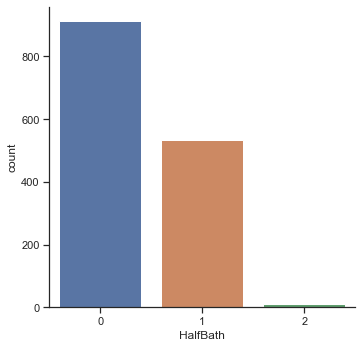

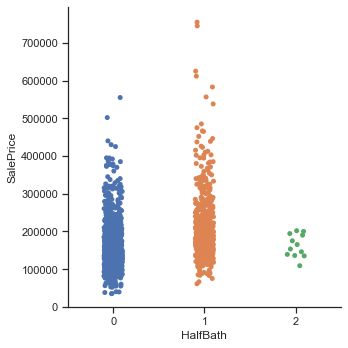

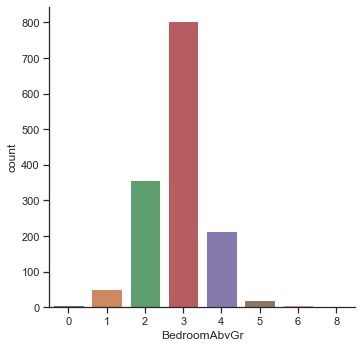

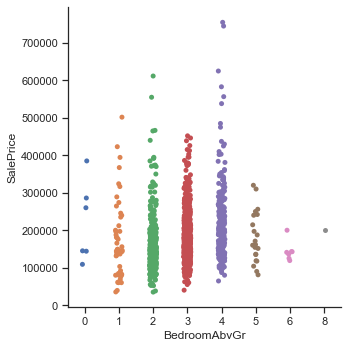

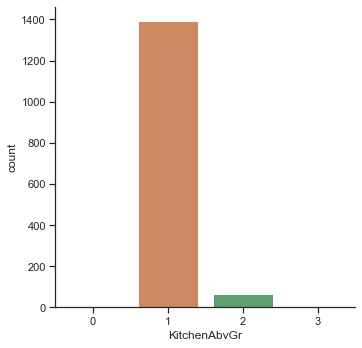

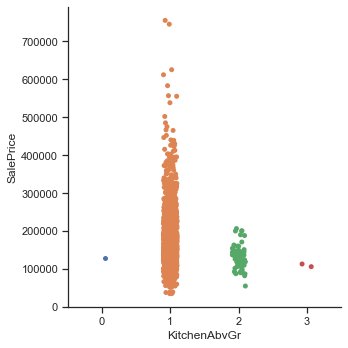

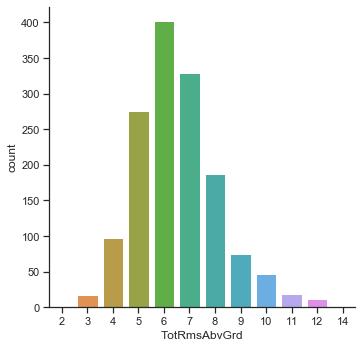

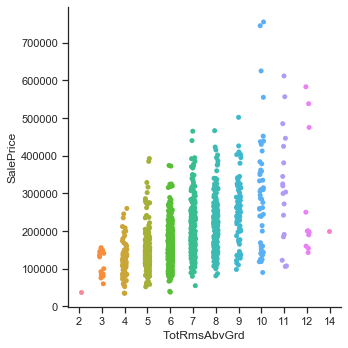

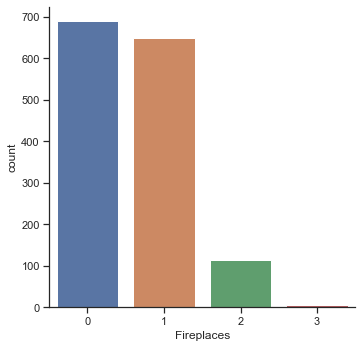

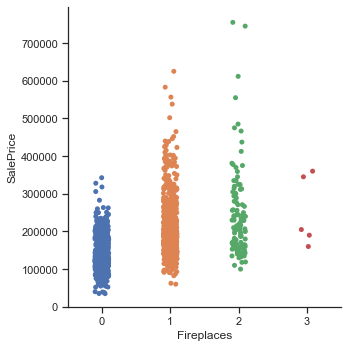

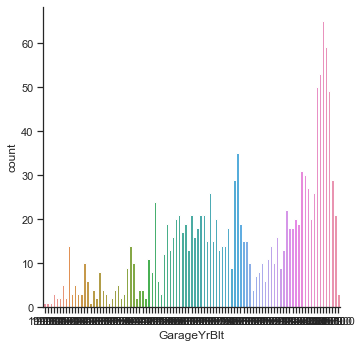

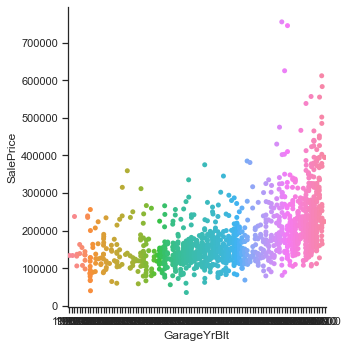

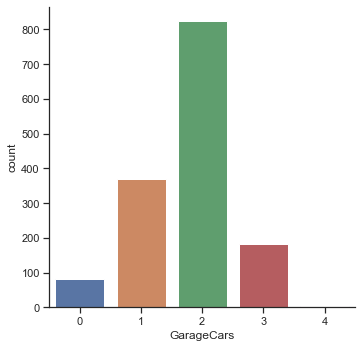

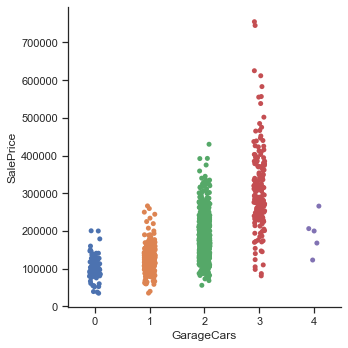

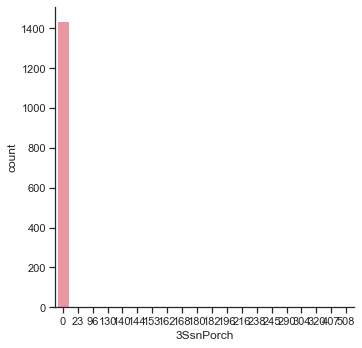

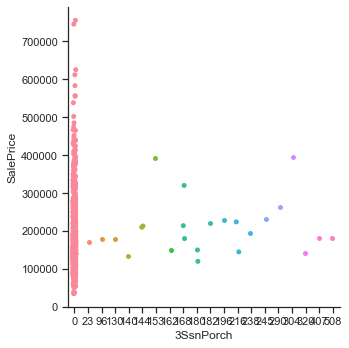

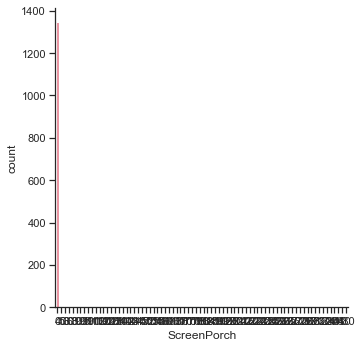

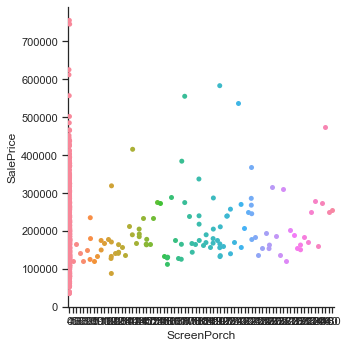

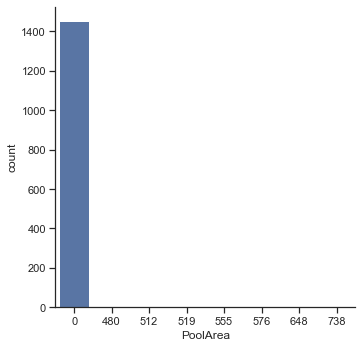

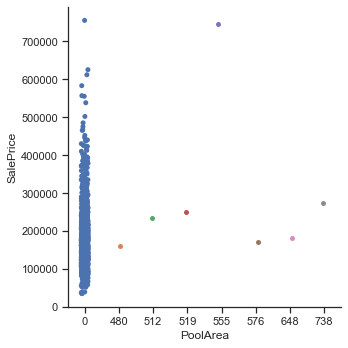

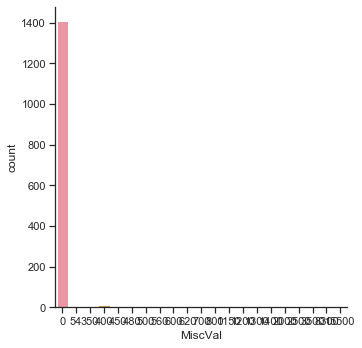

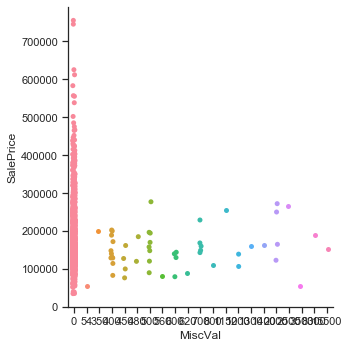

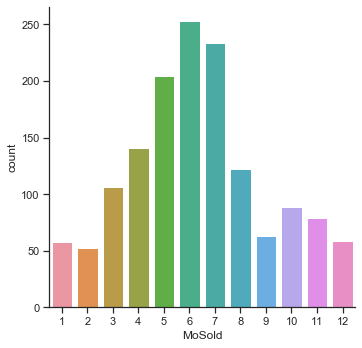

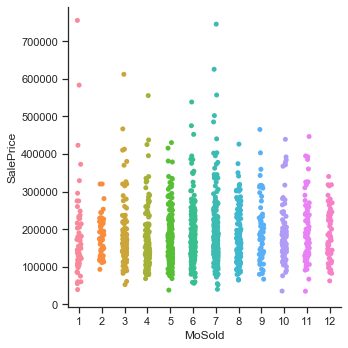

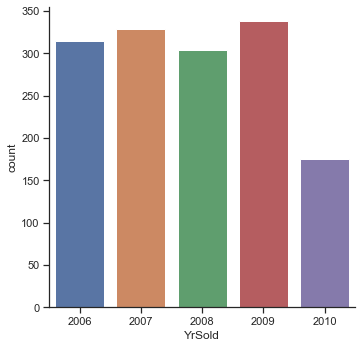

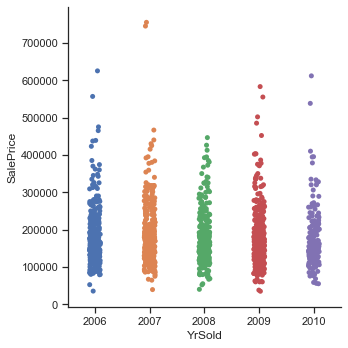

In [13]:
for i in class_numerical_feats:
    sns.set(style="ticks")
    sns.catplot( x=i, kind="count", data=Data_train)
    sns.catplot(x=i, y="SalePrice", data=Data_train)

In [14]:
removeFeatures=['MSSubClass','LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
for i in removeFeatures:
    class_numerical_feats.remove(i)

In [15]:
class_numerical_feats

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars']

In [16]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

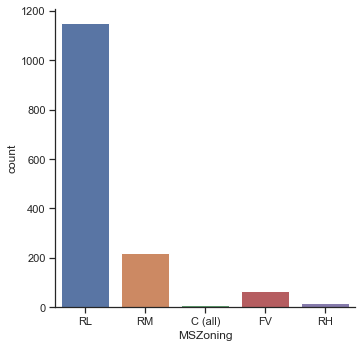

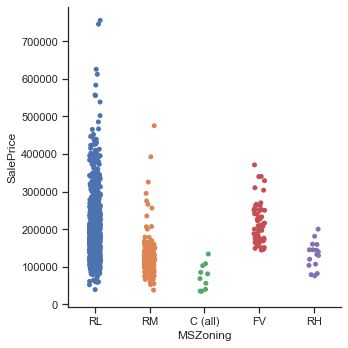

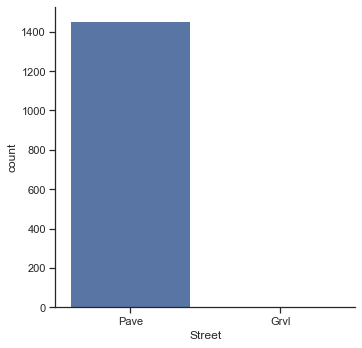

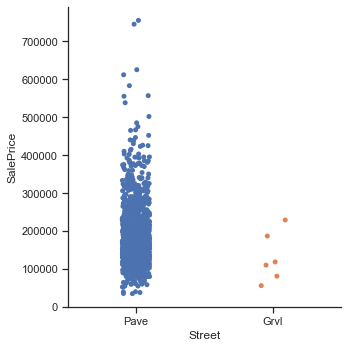

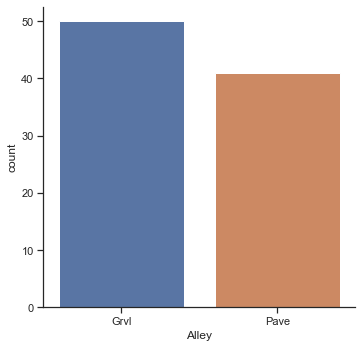

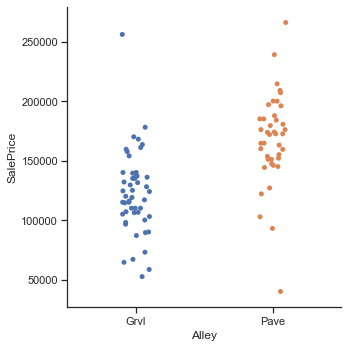

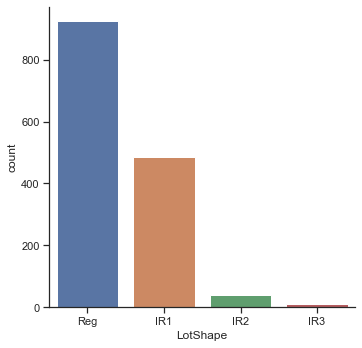

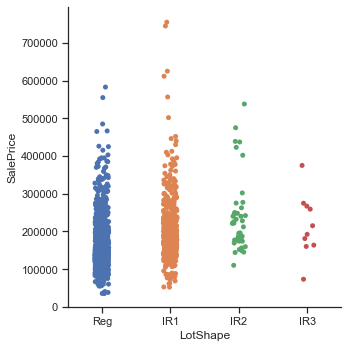

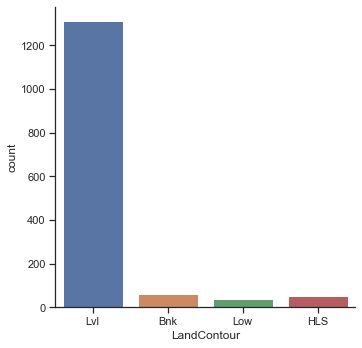

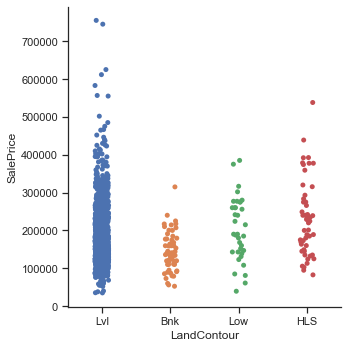

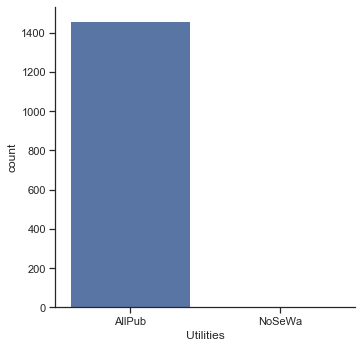

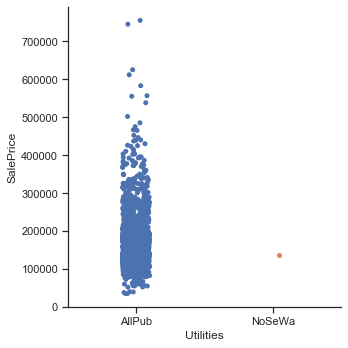

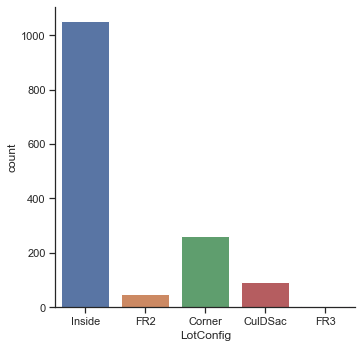

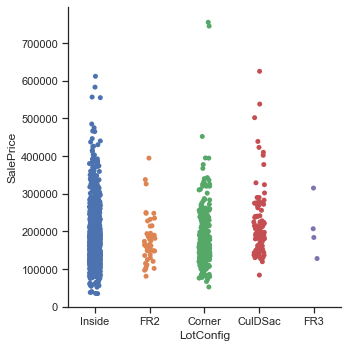

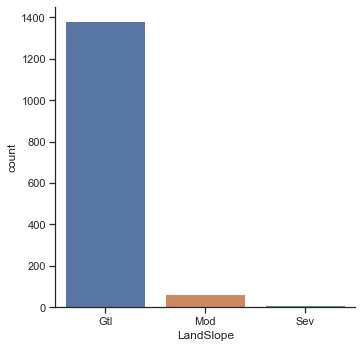

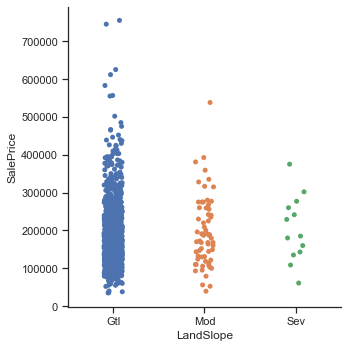

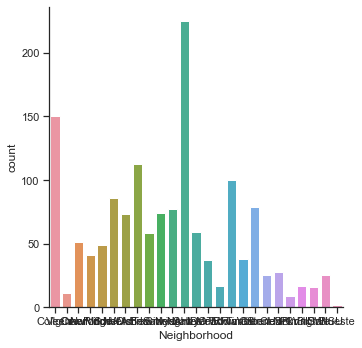

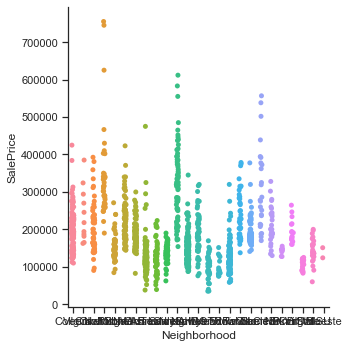

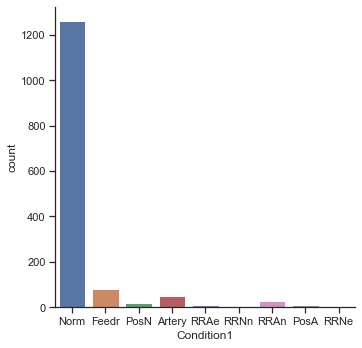

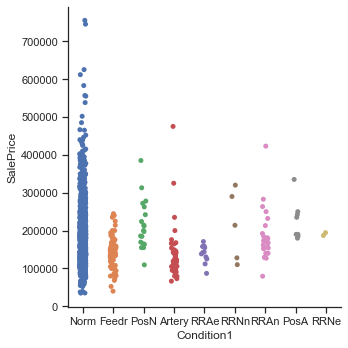

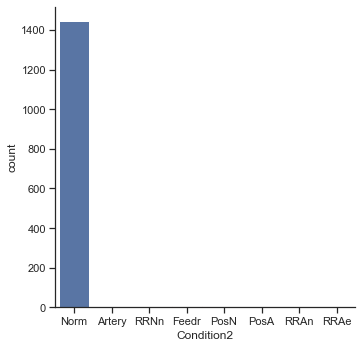

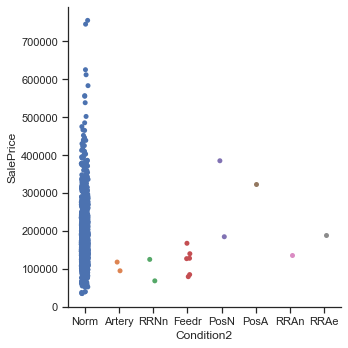

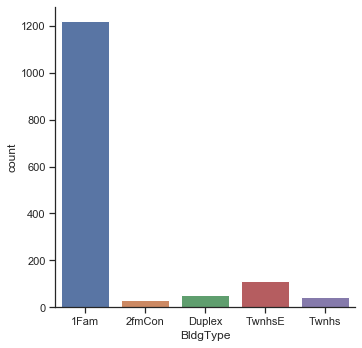

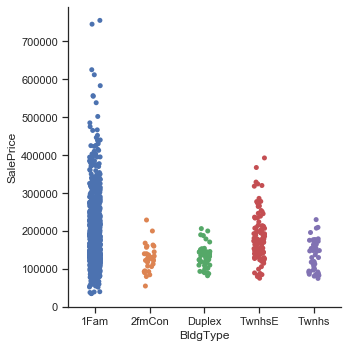

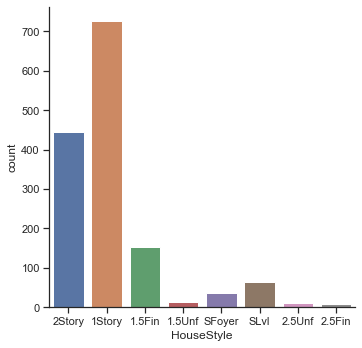

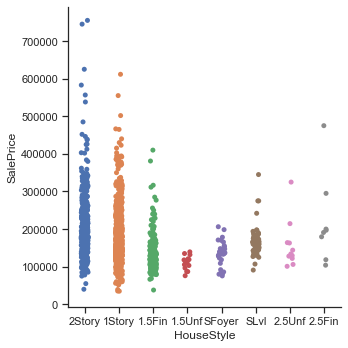

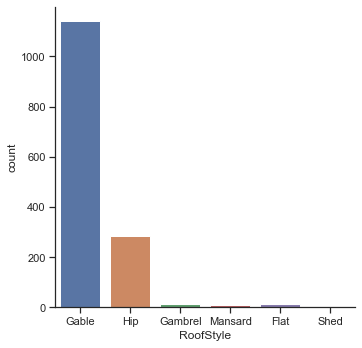

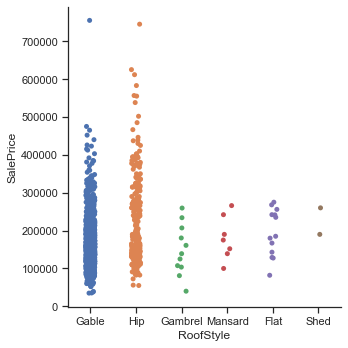

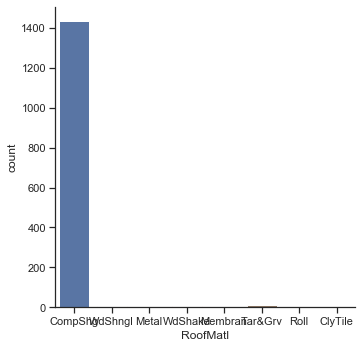

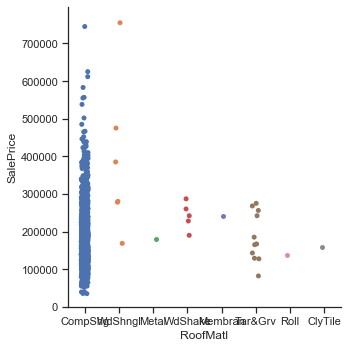

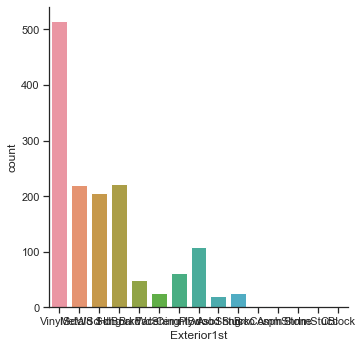

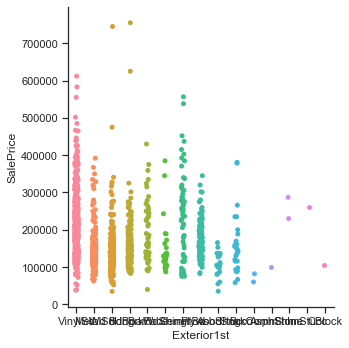

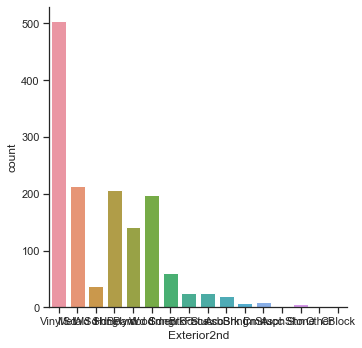

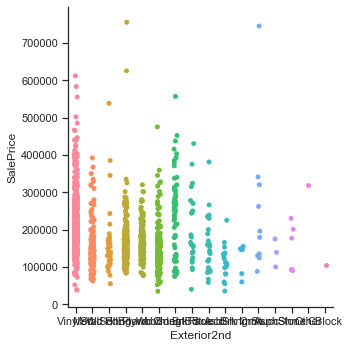

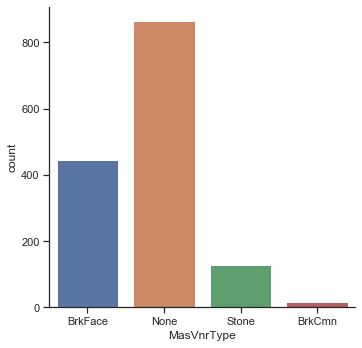

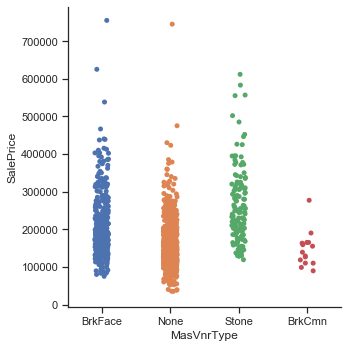

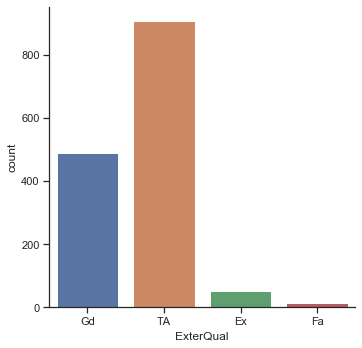

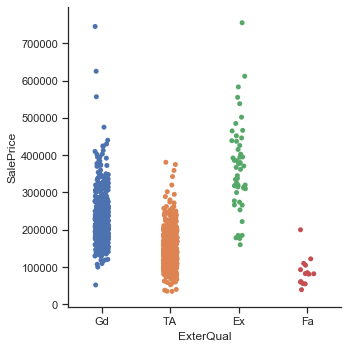

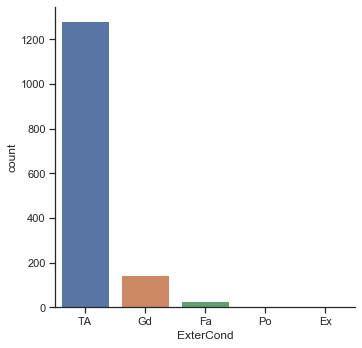

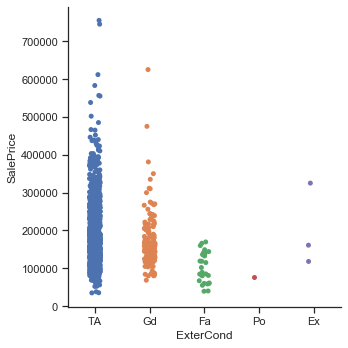

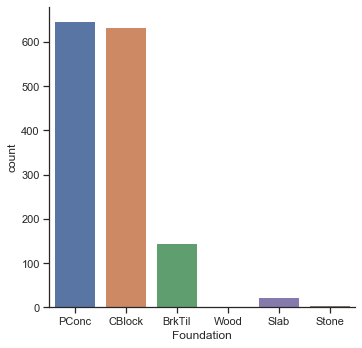

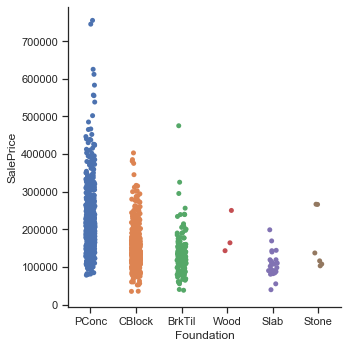

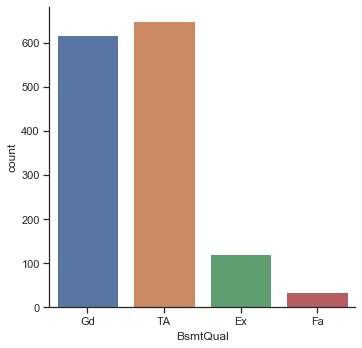

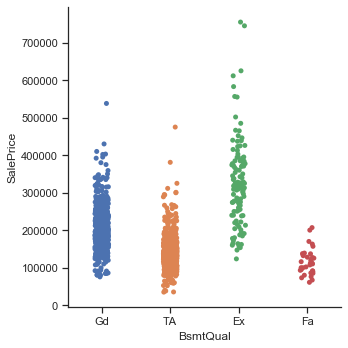

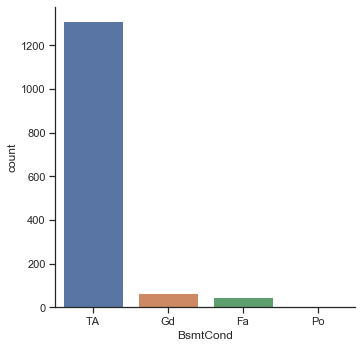

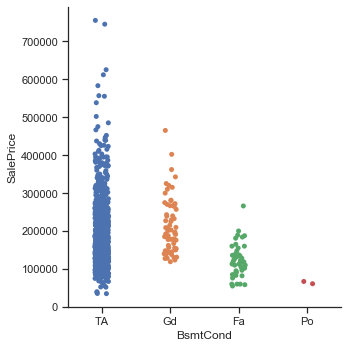

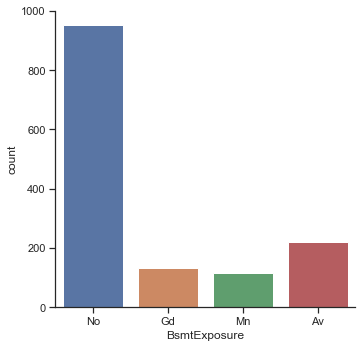

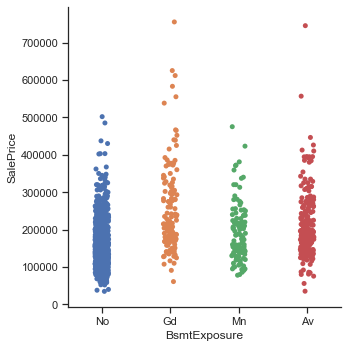

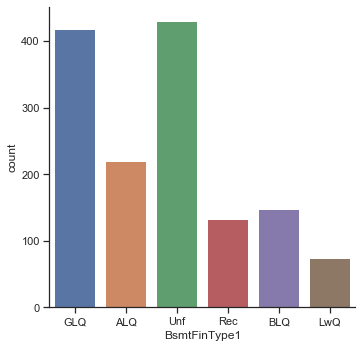

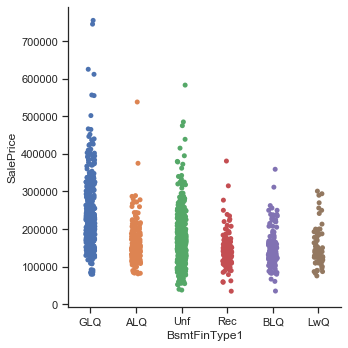

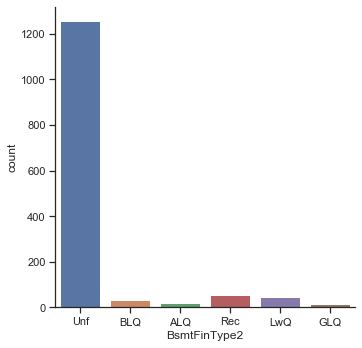

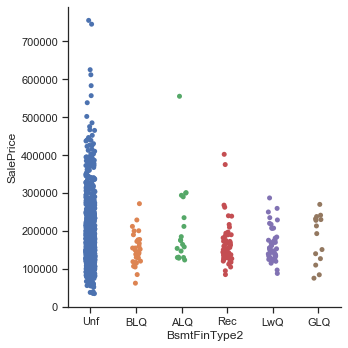

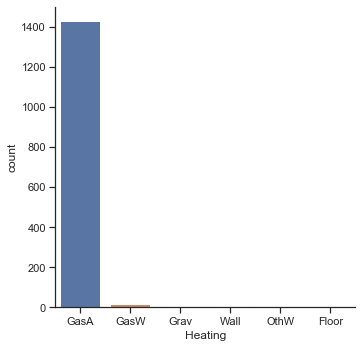

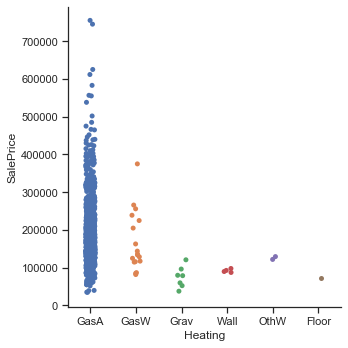

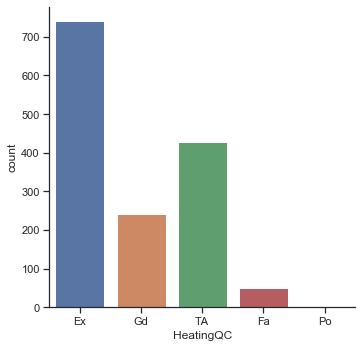

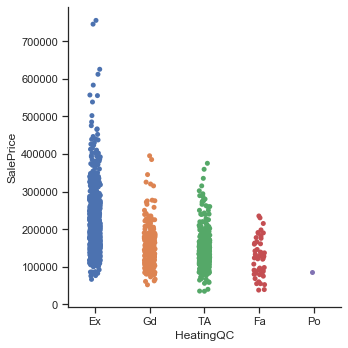

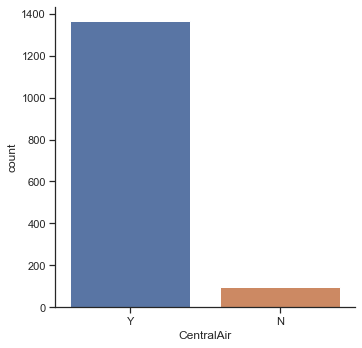

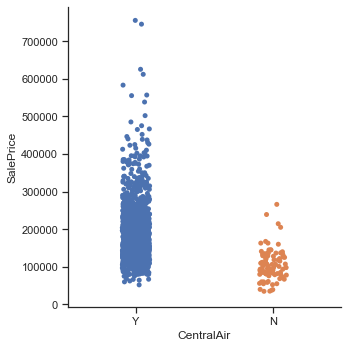

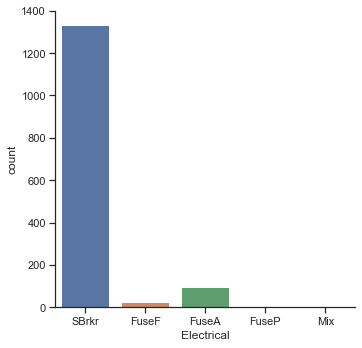

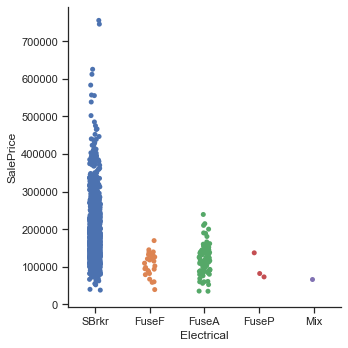

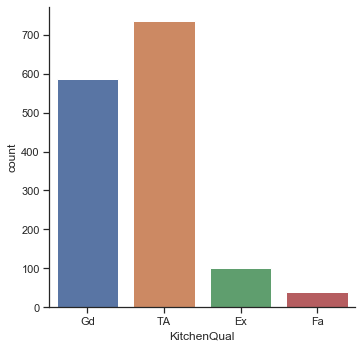

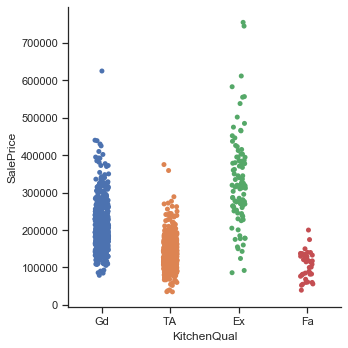

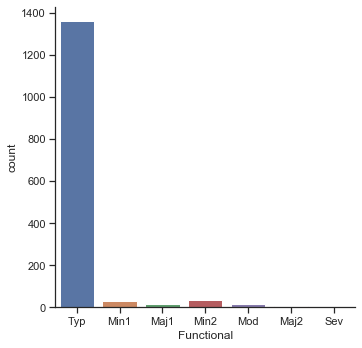

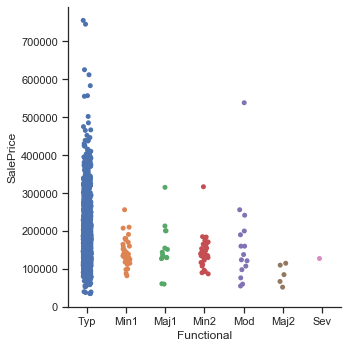

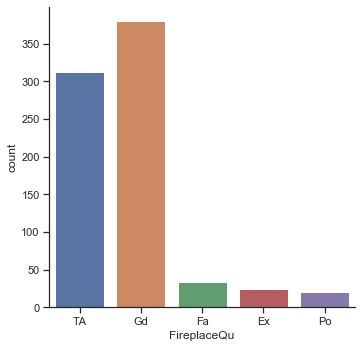

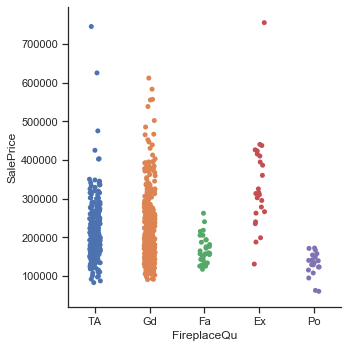

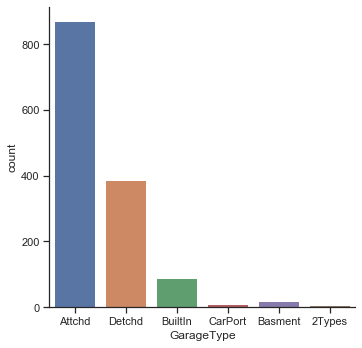

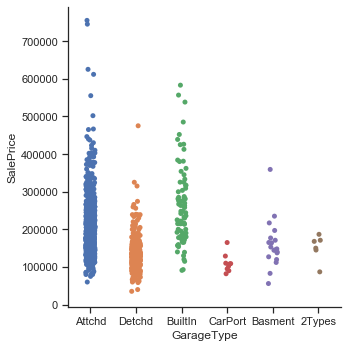

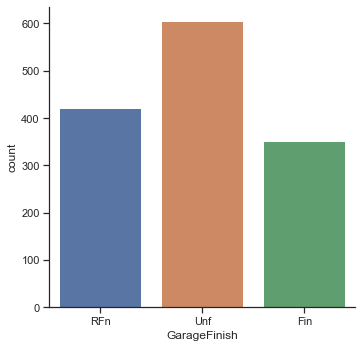

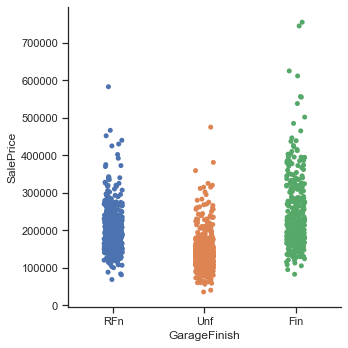

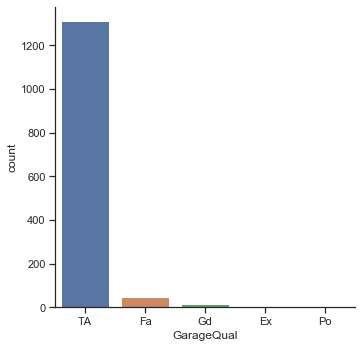

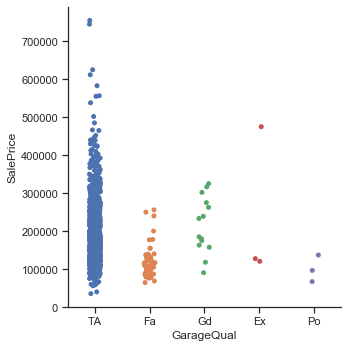

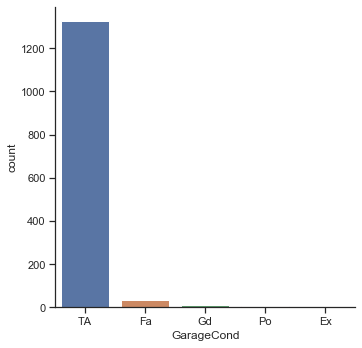

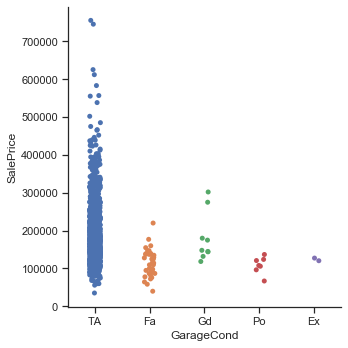

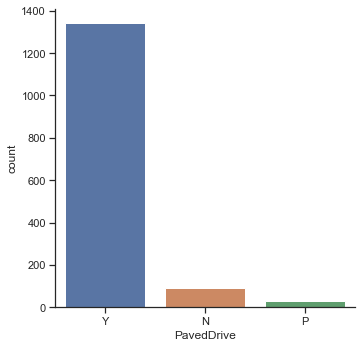

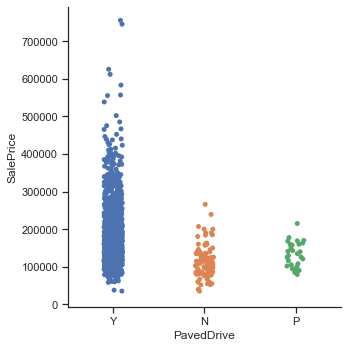

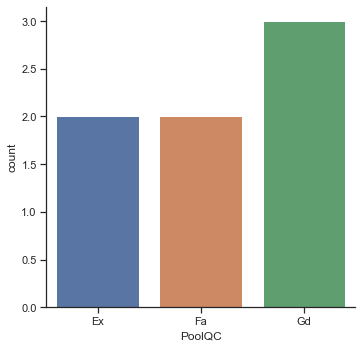

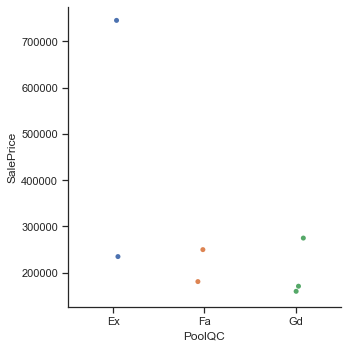

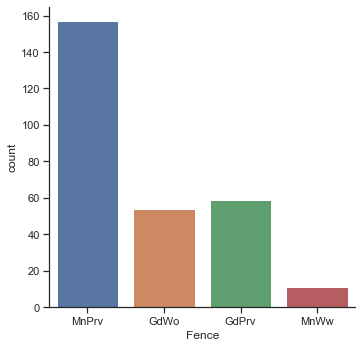

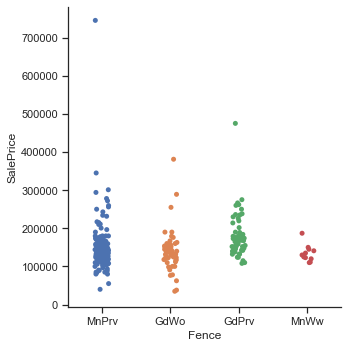

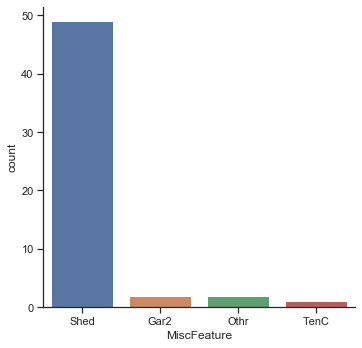

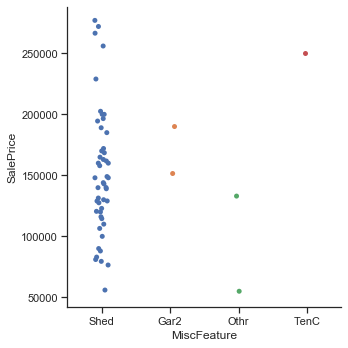

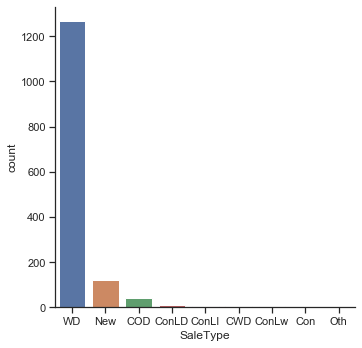

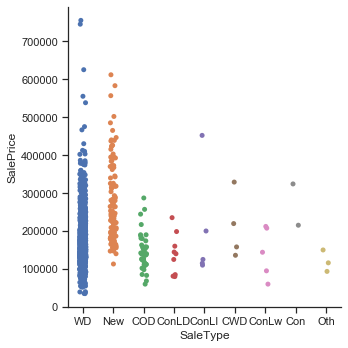

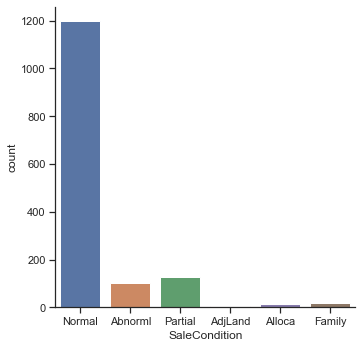

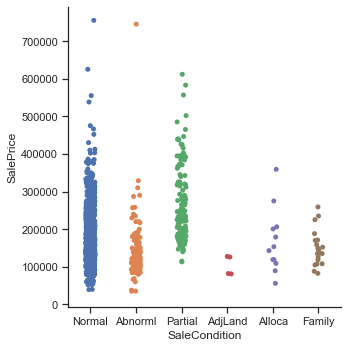

In [17]:
for i in categorical_feats:
    sns.set(style="ticks")
    sns.catplot( x=i, kind="count", data=Data_train)
    sns.catplot(x=i, y="SalePrice", data=Data_train)

In [18]:
removeFeatures=['Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Condition2','RoofMatl','BsmtExposure','PoolQC','Fence','MiscFeature']
categorical_feats=categorical_feats.drop(removeFeatures)

In [19]:
class_numerical_feats

['OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars']

In [20]:
categorical_feats=list(categorical_feats)
categorical_feats

['MSZoning',
 'Alley',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [21]:
conti_numerical_feats

['LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea']

In [22]:
selectedFeatures=categorical_feats+class_numerical_feats+conti_numerical_feats

In [23]:
#缺失值太多
removelist=['Alley', 'LotFrontage', 'FireplaceQu']
for i in removelist:
    selectedFeatures.remove(i)
selectedFeatures.append("Id")
selectedFeatures

['MSZoning',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'Id']

# Skewness Processing

Skewness: 1.882876
Kurtosis: 6.536282


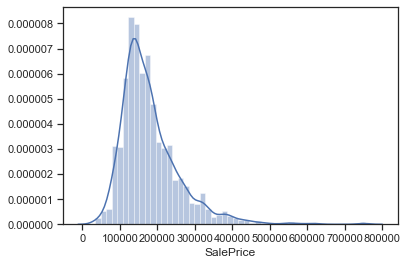

In [25]:
sns.distplot(Data_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % Data_train['SalePrice'].skew())
print("Kurtosis: %f" % Data_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


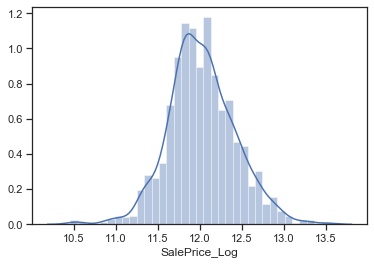

In [26]:
Data_train['SalePrice_Log'] = np.log(Data_train['SalePrice'])

sns.distplot(Data_train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % Data_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % Data_train['SalePrice_Log'].kurt())

SalePrice_Log=Data_train['SalePrice_Log']
SalePrice=Data_train['SalePrice']

# dropping old column
Data_train.drop('SalePrice', axis= 1, inplace=True)

# 空值處理 

In [27]:
AllData=pd.concat([Data_train,Data_test])

In [28]:
#drop null>400 columns
dropList=AllData.isnull().sum()[AllData.isnull().sum()>400].index
AllData.drop(dropList,axis=1,inplace=True)

In [29]:
AllData.isnull().sum()[AllData.isnull().sum()>0]

BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
GarageArea        1
GarageCars        1
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
GarageYrBlt     159
KitchenQual       1
MSZoning          4
MasVnrArea       23
MasVnrType       24
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64

In [30]:
numerical_feats = AllData.dtypes[AllData.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = AllData.dtypes[AllData.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  36
Number of Categorical features:  38


In [31]:
for i in categorical_feats:
    AllData[i].fillna('None',inplace=True)

In [32]:
for i in numerical_feats:
    AllData[i].fillna( AllData[i].mean(),inplace=True)

In [33]:
AllData.isnull().sum()[AllData.isnull().sum()>0]

Series([], dtype: int64)

In [34]:
AllData

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,Twnhs,TA,No,0.0,0.0,Unf,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,3,TwnhsE,TA,No,252.0,0.0,Rec,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,4,1Fam,TA,No,1224.0,0.0,ALQ,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,3,1Fam,TA,Av,337.0,0.0,GLQ,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


# Faeatures Engineer

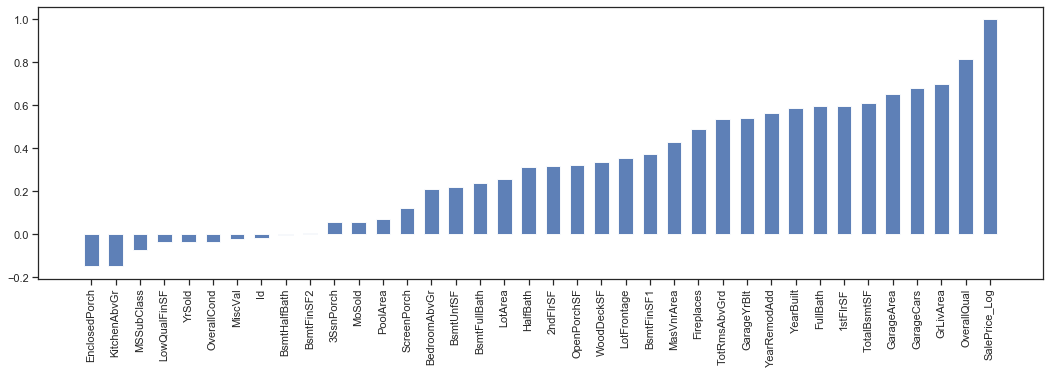

In [35]:
t=Data_train.corrwith(SalePrice_Log)

t=t.sort_values()

t.mean()

plt.subplots(figsize=(18,5))
plt.bar(t.index[:], t[:], alpha=0.9, width = 0.6 ,lw=1)
plt.xticks(range(len(t)), t.index[:], rotation='vertical')
plt.show()
plt.close()

# Select Faeatures (All) Encoding

In [36]:
AllData.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [37]:
AllData[numerical_feats].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


In [38]:
AllData[categorical_feats].head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
1,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,...,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave,AllPub
2,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave,AllPub
3,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,...,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,...,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave,AllPub


In [39]:
AllData=AllData[selectedFeatures]
AllData

,MSZoning,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,Id
0,RL,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,8,0,2003.000000,2.0,196.0,856.0,856,1710,548.0,1
1,RL,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,...,6,1,1976.000000,2.0,0.0,1262.0,1262,1262,460.0,2
2,RL,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,6,1,2001.000000,2.0,162.0,920.0,920,1786,608.0,3
3,RL,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,...,7,1,1998.000000,3.0,0.0,756.0,961,1717,642.0,4
4,RL,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,...,9,1,2000.000000,3.0,350.0,1145.0,1145,2198,836.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,MeadowV,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,...,5,0,1978.113406,0.0,0.0,546.0,546,1092,0.0,2915
1455,RM,MeadowV,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,...,6,0,1970.000000,1.0,0.0,546.0,546,1092,286.0,2916
1456,RL,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,...,7,1,1960.000000,2.0,0.0,1224.0,1224,1224,576.0,2917
1457,RL,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,...,6,0,1978.113406,0.0,0.0,912.0,970,970,0.0,2918


## 挑選哪些col作為編碼要在被修改

In [40]:
numerical_feats = AllData.dtypes[AllData.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = AllData.dtypes[AllData.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  20
Number of Categorical features:  29


In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in categorical_feats:
    #print(i)
    #print(AllData[i].unique())
    AllData[i]=labelencoder.fit_transform(AllData[i])

In [42]:
Data_testID=AllData[1460:]['Id']

In [43]:
Data_train=AllData[:1460]

Data_test=AllData[1460:]

# Linear Regression Model

In [44]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 49 columns):
MSZoning         1460 non-null int32
Neighborhood     1460 non-null int32
Condition1       1460 non-null int32
BldgType         1460 non-null int32
HouseStyle       1460 non-null int32
RoofStyle        1460 non-null int32
Exterior1st      1460 non-null int32
Exterior2nd      1460 non-null int32
MasVnrType       1460 non-null int32
ExterQual        1460 non-null int32
ExterCond        1460 non-null int32
Foundation       1460 non-null int32
BsmtQual         1460 non-null int32
BsmtCond         1460 non-null int32
BsmtFinType1     1460 non-null int32
BsmtFinType2     1460 non-null int32
Heating          1460 non-null int32
HeatingQC        1460 non-null int32
CentralAir       1460 non-null int32
Electrical       1460 non-null int32
KitchenQual      1460 non-null int32
Functional       1460 non-null int32
GarageType       1460 non-null int32
GarageFinish     1460 non-null int32
Garag

In [45]:
Data_train

,MSZoning,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,Id
0,4,5,2,0,5,1,13,14,1,2,...,8,0,2003.0,2.0,196.0,856.0,856,1710,548.0,1
1,4,24,1,0,2,1,8,8,2,3,...,6,1,1976.0,2.0,0.0,1262.0,1262,1262,460.0,2
2,4,5,2,0,5,1,13,14,1,2,...,6,1,2001.0,2.0,162.0,920.0,920,1786,608.0,3
3,4,6,2,0,5,1,14,16,2,3,...,7,1,1998.0,3.0,0.0,756.0,961,1717,642.0,4
4,4,15,2,0,5,1,13,14,1,2,...,9,1,2000.0,3.0,350.0,1145.0,1145,2198,836.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,8,2,0,5,1,13,14,2,3,...,7,1,1999.0,2.0,0.0,953.0,953,1647,460.0,1456
1456,4,14,2,0,2,1,10,11,3,3,...,7,2,1978.0,2.0,119.0,1542.0,2073,2073,500.0,1457
1457,4,6,2,0,5,1,5,5,2,0,...,9,2,1941.0,1.0,0.0,1152.0,1188,2340,252.0,1458
1458,4,12,2,0,2,3,8,8,2,3,...,5,0,1950.0,1.0,0.0,1078.0,1078,1078,240.0,1459


In [46]:
SalePrice_Log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice_Log, Length: 1460, dtype: float64

In [47]:
X=AllData[:1460]
y=SalePrice_Log

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
reg = lm.fit(X, y)
y_pred = lm.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y))
print("Mean square error :",rmse)

Mean square error : 0.14066041629517487


In [49]:
Data_test=AllData[1460:]

In [50]:
Data_test

,MSZoning,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,Id
0,3,12,1,0,2,1,13,14,2,3,...,5,0,1961.000000,1.0,0.0,882.0,896,896,730.0,1461
1,4,12,2,0,2,3,14,15,1,3,...,6,0,1958.000000,1.0,108.0,1329.0,1329,1329,312.0,1462
2,4,8,2,0,5,1,13,14,2,3,...,6,1,1997.000000,2.0,0.0,928.0,928,1629,482.0,1463
3,4,8,2,0,5,1,13,14,1,3,...,7,1,1998.000000,2.0,20.0,926.0,926,1604,470.0,1464
4,4,22,2,4,2,1,6,6,2,2,...,5,0,1992.000000,2.0,0.0,1280.0,1280,1280,506.0,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,10,2,3,5,1,5,5,2,3,...,5,0,1978.113406,0.0,0.0,546.0,546,1092,0.0,2915
1455,5,10,2,4,5,1,5,5,2,3,...,6,0,1970.000000,1.0,0.0,546.0,546,1092,286.0,2916
1456,4,11,2,0,2,1,13,14,2,3,...,7,1,1960.000000,2.0,0.0,1224.0,1224,1224,576.0,2917
1457,4,11,2,0,6,1,6,16,2,3,...,6,0,1978.113406,0.0,0.0,912.0,970,970,0.0,2918


In [51]:
price=reg.predict(Data_test)

Data_res=pd.concat([Data_testID,pd.DataFrame(np.exp(price))],axis=1)

Data_res.columns=['Id','SalePrice']

Data_res.to_csv('LinearReg5.csv',index=False)

# Your submission scored 0.13424, which is an improvement of your previous score of 0.48086